In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("202201-divvy-tripdata.csv")
df2 =  pd.read_csv("202202-divvy-tripdata.csv")
df3 =  pd.read_csv("202203-divvy-tripdata.csv")
df4 =  pd.read_csv("202204-divvy-tripdata.csv")
df5 =  pd.read_csv("202205-divvy-tripdata.csv")
df6 =  pd.read_csv("202206-divvy-tripdata.csv")
df7 =  pd.read_csv("202207-divvy-tripdata.csv")
df8 =  pd.read_csv("202208-divvy-tripdata.csv")
df9 =  pd.read_csv("202209-divvy-publictripdata.csv")
df10 =  pd.read_csv("202210-divvy-tripdata.csv")
df11 =  pd.read_csv("202211-divvy-tripdata.csv")
df12 =  pd.read_csv("202212-divvy-tripdata.csv")

In [4]:
df= pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],ignore_index=True)# combine all the dfs

df = df.drop(['start_station_name', 'start_station_id', 
         'end_station_name','end_station_id',
         'start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1) #drop columns that are not usuful for the analysis

df[['started_at', 'ended_at']] = df[['started_at', 'ended_at']].apply(pd.to_datetime) #convert the dateframe object or 
#strings objects to datetime object
df['ride_length'] = (df.ended_at - df.started_at)/pd.Timedelta(seconds=1) #create ride_lenght column and calc. time diff.
# btw started_at and ended_at.
df['day_of_week'] = df['started_at'].dt.dayofweek #extract the day of the week from started_at(datetime object) column
# 0-Monday and 6-Sunday
df['weekday'] = df['started_at'].dt.day_name() #get the weekday as a string.
df['started_at_month'] = df['started_at'].dt.month
df['started_at_monthName'] = df['started_at'].dt.month_name()

df = df.sort_values(by=['member_casual', 'started_at_month','weekday'])



In [5]:
df

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week,weekday,started_at_month,started_at_monthName
34,88543D9BC6760955,classic_bike,2022-01-14 10:14:38,2022-01-14 10:27:07,casual,749.0,4,Friday,1,January
55,4C82D05AEAB243A2,classic_bike,2022-01-28 08:52:24,2022-01-28 09:08:33,casual,969.0,4,Friday,1,January
102,3853584C874661D8,classic_bike,2022-01-21 14:36:40,2022-01-21 15:07:40,casual,1860.0,4,Friday,1,January
148,8B4B7CDC08980910,classic_bike,2022-01-14 11:15:45,2022-01-14 11:39:01,casual,1396.0,4,Friday,1,January
173,9C9D32A6465B61E3,electric_bike,2022-01-21 11:07:25,2022-01-21 11:15:09,casual,464.0,4,Friday,1,January
...,...,...,...,...,...,...,...,...,...,...
5667706,1CE1BE852794BD42,electric_bike,2022-12-21 12:46:36,2022-12-21 12:49:51,member,195.0,2,Wednesday,12,December
5667707,EB7999FF9DBC0535,electric_bike,2022-12-21 19:08:04,2022-12-21 19:17:14,member,550.0,2,Wednesday,12,December
5667711,7BDEDE9860418B53,classic_bike,2022-12-07 06:52:45,2022-12-07 06:56:36,member,231.0,2,Wednesday,12,December
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,member,779.0,2,Wednesday,12,December


In [6]:
month_average_ride_length = df.groupby('started_at_monthName').mean().drop(['day_of_week','started_at_month'], axis=1)
month_average_ride_length = month_average_ride_length.sort_values(by='ride_length')
month_average_ride_length
# key insight : june has the maximum average ride length while december has the minimum average ride lenght

,ride_length
started_at_monthName,
December,810.073270
November,849.564564
February,854.419232
January,915.879840
October,1041.346014
April,1058.121495
March,1109.834778
September,1158.636795
August,1239.437356


In [62]:
file_name = '2022_cylistics_data1.xlsx'
month_average_ride_length.to_excel(file_name)

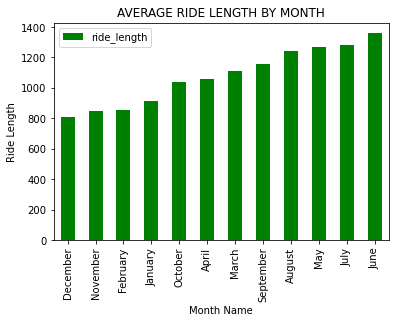

In [43]:
month_average_ride_length.plot(kind='bar', color="green")
plt.title("AVERAGE RIDE LENGTH BY MONTH")
plt.ylabel("Ride Length")
plt.xlabel("Month Name")
plt.show()

In [91]:
month_average_ride_length_by_user = df.groupby([ 'member_casual', 'started_at_monthName']).mean('ride_lenght').drop(['day_of_week','started_at_month'], axis=1)
month_average_ride_length_by_user  = month_average_ride_length_by_user .sort_values(by='ride_length')
month_average_ride_length_by_user
m_a_r_l_b_u = month_average_ride_length_by_user
m_a_r_l_b_u
# key insight : 
# 1. june has the maximum average ride length while december has the minimum average ride lenght for member.
# 2. March has the maximum average ride length while November has the minimum average ride lenght for casual

ride_length
member_casual started_at_monthName             
member        December               637.169269
              November               667.717315
              February               684.331766
              April                  689.544247
              October                717.490280
              March                  717.499732
              January                718.890592
              September              777.008398
              May                    802.000612
              August                 803.049809
              July                   823.100409
              June                   839.906033
casual        November              1277.174116
              December              1337.373858
              October               1583.245611
              February              1602.507051
              September             1679.110133
              July                  1756.685269
              August                1758.602899
              April                 1771.945624
              January               1822.647300
              May                   1852.176702
              June                  1925.818513
              March                 1957.343428

In [63]:
file_name = '2022_cylistics_data2.xlsx'
m_a_r_l_b_u.to_excel(file_name)

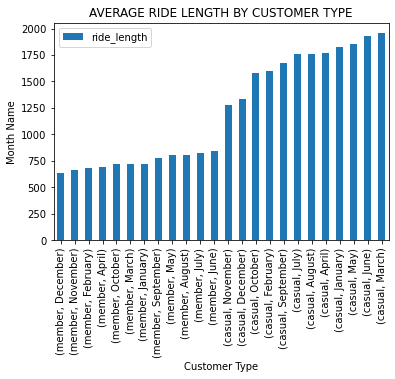

In [87]:
month_average_ride_length_by_user.plot(kind='bar', title="AVERAGE RIDE LENGTH BY CUSTOMER TYPE",stacked=True)
plt.ylabel("Month Name")
plt.xlabel("Customer Type")
plt.show()

In [8]:
Average_ride_lenght_by_rideable_type = df.groupby(['member_casual','weekday','rideable_type']).mean().drop(['day_of_week','started_at_month'], axis=1)
Average_ride_lenght_by_rideable_type

ride_length
member_casual weekday   rideable_type             
casual        Friday    classic_bike   1668.150001
                        docked_bike    7725.505837
                        electric_bike   941.144313
              Monday    classic_bike   1734.168890
                        docked_bike    7030.881695
                        electric_bike   974.455837
              Saturday  classic_bike   1823.120094
                        docked_bike    7564.721935
                        electric_bike  1091.833053
              Sunday    classic_bike   1894.291403
                        docked_bike    7827.397156
                        electric_bike  1103.176920
              Thursday  classic_bike   1592.500101
                        docked_bike    6993.764994
                        electric_bike   879.695315
              Tuesday   classic_bike   1628.594434
                        docked_bike    6861.554404
                        electric_bike   868.700130
              Wednesday classic_bike   1564.892083
                        docked_bike    6803.566426
                        electric_bike   854.441666
member        Friday    classic_bike    820.214349
                        electric_bike   684.475801
              Monday    classic_bike    803.836250
                        electric_bike   662.137260
              Saturday  classic_bike    932.157870
                        electric_bike   760.203224
              Sunday    classic_bike    920.620498
                        electric_bike   756.537884
              Thursday  classic_bike    807.139336
                        electric_bike   667.235735
              Tuesday   classic_bike    797.667734
                        electric_bike   652.721130
              Wednesday classic_bike    792.613941
                        electric_bike   655.306688

In [64]:
file_name = '2022_cylistics_data3.xlsx'
Average_ride_lenght_by_rideable_type.to_excel(file_name)

In [57]:
month_mode_day_of_week =  df.groupby(['started_at_monthName','member_casual']).max('ride_lenght').drop(['started_at_month'], axis=1)
month_mode_day_of_week = month_mode_day_of_week.sort_values(by='ride_length')
month_mode_day_of_week
# key insight:
# 1. the day of week with maximum ride lenght for both casual and member is Saturday for all month.
# 2. casual has the maximum ride lenght for all month.
# 3. almost the same maximum ride lenght for member for all month
# 4. october has the highest maximum ride lenght while February has the lowest maximum ride length
# key takehome: saturday is a good business day for both casual and member in all month.

,,ride_length,day_of_week
started_at_monthName,member_casual,,
July,member,89996.0,6
November,member,89996.0,6
May,member,89996.0,6
December,member,89996.0,6
February,member,89996.0,6
October,member,89997.0,6
June,member,89997.0,6
January,member,89997.0,6
September,member,89997.0,6


In [59]:
month_mode_day_of_week.groupby(['member_casual']).size()

member_casual
casual    12
member    12
dtype: int64

In [10]:
mode_day_of_week = df['weekday'].mode()
mode_day_of_week 

0    Saturday
dtype: object

In [11]:
df['started_at_monthName'].mode()

0    July
dtype: object

In [54]:
max_ride_lenght = df['ride_length'].max()/3600
max_ride_lenght 

689.7875

In [12]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'member_casual',
       'ride_length', 'day_of_week', 'weekday', 'started_at_month',
       'started_at_monthName'],
      dtype='object')

In [13]:
mode_day_of_week1 = df['rideable_type'].mode()
mode_day_of_week1
# most rideable type is electric_bike

0    electric_bike
dtype: object

In [14]:
average_ride_lenght  = df['ride_length'].mean()
average_ride_lenght 

1166.5971446704202

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ride_length,5667717.0,1166.597145,10567.687857,-621201.0,349.0,617.0,1108.0,2483235.0
day_of_week,5667717.0,3.061312,1.975531,0.0,1.0,3.0,5.0,6.0
started_at_month,5667717.0,7.112062,2.531366,1.0,5.0,7.0,9.0,12.0
